#### In light of the recent police violence instances that has caused uproar in the United States,  I wanted to learn and research about the topic to educate ourselves and, hopefully, the people around us. The data is structured (241659, 41). The data is not highly dimensional, but we definitely need to scrub through to ascertain a basic understanding as to what each feature entails.

In [2]:
#Import the basic libraries for exploratory analysis
import os
import numpy as np
import pandas as pd

# Initial Exploratory Analysis

In [3]:
#Read the Sentencing file
sentencing = pd.read_csv("Sentencing.csv")

sentencing.columns


/Users/srikanthnanduri/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,11,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['CASE_ID', 'CASE_PARTICIPANT_ID', 'RECEIVED_DATE', 'OFFENSE_CATEGORY',
       'PRIMARY_CHARGE_FLAG', 'CHARGE_ID', 'CHARGE_VERSION_ID',
       'DISPOSITION_CHARGED_OFFENSE_TITLE', 'CHARGE_COUNT', 'DISPOSITION_DATE',
       'DISPOSITION_CHARGED_CHAPTER', 'DISPOSITION_CHARGED_ACT',
       'DISPOSITION_CHARGED_SECTION', 'DISPOSITION_CHARGED_CLASS',
       'DISPOSITION_CHARGED_AOIC', 'CHARGE_DISPOSITION',
       'CHARGE_DISPOSITION_REASON', 'SENTENCE_JUDGE', 'SENTENCE_COURT_NAME',
       'SENTENCE_COURT_FACILITY', 'SENTENCE_PHASE', 'SENTENCE_DATE',
       'SENTENCE_TYPE', 'CURRENT_SENTENCE_FLAG', 'COMMITMENT_TYPE',
       'COMMITMENT_TERM', 'COMMITMENT_UNIT', 'LENGTH_OF_CASE_in_Days',
       'AGE_AT_INCIDENT', 'RACE', 'GENDER', 'INCIDENT_CITY',
       'INCIDENT_BEGIN_DATE', 'INCIDENT_END_DATE', 'LAW_ENFORCEMENT_AGENCY',
       'LAW_ENFORCEMENT_UNIT', 'ARREST_DATE', 'FELONY_REVIEW_DATE',
       'FELONY_REVIEW_RESULT', 'ARRAIGNMENT_DATE', 'UPDATED_OFFENSE_CATEGORY'],
      dtype='objec

In [4]:
sentencing.shape

(241659, 41)

#### My first goal is to understand what exactly the makeup of the data is. Specifically, key fields such as, 'RACE','GENDER', 'SENTENCE_PHASE', 'SENTENCE_TYPE', 'SENTENCE_JUDGE', 'COMMITMENT_TYPE', 'COMMITMENT_TERM', 'COMMITMENT_UNIT', 'OFFENSE_CATEGORY', 'UPDATED_OFFENSE_CATEGORY', 'INCIDENT_BEGIN_DATE', and 'ARRAIGNMENT_DATE' are a few of the columns or attributes that standout. 

#### This is for a few reasons:
1. This will help us determine distribution of charges for RACE
2. Understand the sentence type and offense committed
3. The length of time between incident and arraignment
4. The overall result of the hearing

#### Through this exploratory analysis, other columns might become relevant to the analysis. We will go back and add additional information as required.

In [5]:
a_lst = ['RACE','GENDER', 'SENTENCE_PHASE', 'SENTENCE_TYPE', 
         'SENTENCE_JUDGE', 'COMMITMENT_TYPE','COMMITMENT_TERM', 
         'COMMITMENT_UNIT', 'OFFENSE_CATEGORY', 'UPDATED_OFFENSE_CATEGORY', 
         'INCIDENT_BEGIN_DATE', 'ARRAIGNMENT_DATE']

for i in a_lst:
    print(sentencing[i].value_counts())
    print(" ")

Black                               160366
White [Hispanic or Latino]           36657
White                                34364
HISPANIC                              5871
Asian                                 1385
White/Black [Hispanic or Latino]      1194
Unknown                                343
American Indian                        124
ASIAN                                   65
Biracial                                35
Name: RACE, dtype: int64
 
Male                          211862
Female                         28981
Unknown                            6
Unknown Gender                     3
Male name, no gender given         3
Name: GENDER, dtype: int64
 
Original Sentencing               231059
Probation Violation Sentencing      6788
Resentenced                         1912
Amended/Corrected Sentencing        1587
Remanded Sentencing                  309
Summary Charge Info                    4
Name: SENTENCE_PHASE, dtype: int64
 
Prison                                   12919

#### Based on the above, there are not very many columns that need significant cleaning. 'RACE', 'GENDER', 'COMMITMENT_TYPE' and 'COMMITMENT_TERM'.

In [6]:
rlst = ['White [Hispanic or Latino]', 'White/Black [Hispanic or Latino]', 'HISPANIC']
for i in rlst:
    sentencing['RACE'] = sentencing['RACE'].replace(i, 'Hispanic')

#consolidating the ASIAN and Asian into one category
sentencing['RACE'] = sentencing['RACE'].replace('ASIAN', 'Asian')

sentencing['RACE'].value_counts()

Black              160366
Hispanic            43722
White               34364
Asian                1450
Unknown               343
American Indian       124
Biracial               35
Name: RACE, dtype: int64

In [7]:
glst = ['Unknown', 'Unknown Gender', 'Male name, no gender given']
for i in glst:
    sentencing['GENDER'] = sentencing['GENDER'].replace(i, 'Unknown')

sentencing['GENDER'].value_counts()

Male       211862
Female      28981
Unknown        12
Name: GENDER, dtype: int64

In [8]:
sentencing['COMMITMENT_TERM'].describe()

count     239997.0
unique       679.0
top            2.0
freq       48803.0
Name: COMMITMENT_TERM, dtype: float64

In [9]:
sentencing['COMMITMENT_TYPE'].value_counts()

Illinois Department of Corrections               130978
Probation                                         76773
Cook County Department of Corrections              6830
710/410 Probation                                  6105
Intensive Probation Services                       3756
Conditional Discharge                              3125
Cook County Boot Camp                              2351
Mental Health Probation                            2332
Court Supervision                                  2204
Intensive Drug Probation Services                  1888
Drug Court Probation                               1018
Sex Offender Probation                              658
Gang Probation                                      658
2nd Chance Probation                                414
Cook County Impact Incarceration Program            277
Veteran's Court Probation                           224
Inpatient Mental Health Services                    181
Drug School                                     

The three terms are difficult to manuever, primarily becauses the measurement is not standardized. We need to figure out how to make this more unified. One way would be to remove any fields that are less that 2% of the total population.


In [10]:
sentencing['CHARGE_DISPOSITION_REASON'].value_counts()

Drug Court Graduate                                     413
PG to Other Count/s                                     151
Mental Health Graduate                                  151
Veteran's Court Graduate                                 35
Proceeding on Other Count/s                              32
Judgement & Conviction Vacated                           19
Adjudicated Minor                                        16
PG to Misdemeanor                                         6
Proceeding on Other Case/s                                5
Complaining Witness Not in Court                          4
Re-Indictment                                             4
Motion to Quash Arrest & Suppress Evidence/Sustained      3
Nolle - AONIC                                             2
Deferred Prosecution Program Completed                    2
Name: CHARGE_DISPOSITION_REASON, dtype: int64

In [11]:
sentencing['COMMITMENT_UNIT'].value_counts()

Year(s)         174355
Months           55679
Days              6798
Term              2340
Natural Life       714
Dollars             72
Hours               19
Weeks               16
Pounds               2
Ounces               1
Kilos                1
Name: COMMITMENT_UNIT, dtype: int64

# Data Cleaning: Commitment Term and Commitment Unit

#### Next step is to standardize the values from above. The easiest method of measurement would be to stick with years becuase it will be the largest increment of measurement. Therefore, I will begin with first removing the unnecessary fields such as 'Pounds','Ounces' and 'Kilos'. Collectively, Dollars through Kilos make up an insignificant amount of the total population.

In [12]:
sentencing.shape

(241659, 41)

In [13]:
#Dealing with Dollars, Pounds, Ounces and Kilos
rlst = ['Dollars','Pounds','Ounces','Kilos']

for i in rlst:
    sentencing['COMMITMENT_UNIT'] = sentencing['COMMITMENT_UNIT'].replace(i,np.nan)

sentencing['COMMITMENT_UNIT'].dropna(axis = 0, inplace = True)
sentencing['COMMITMENT_UNIT'].isnull().sum()

0

Dealing with the time attributes will be tricky because I am going to need to update the COMMITMENT_TERM column first based on the unit value. Then, I can convert replace the unit values so everything is standardized to 'Years'.

In [14]:
sentencing['COMMITMENT_UNIT'].value_counts()

Year(s)         174355
Months           55679
Days              6798
Term              2340
Natural Life       714
Hours               19
Weeks               16
Name: COMMITMENT_UNIT, dtype: int64

In [15]:
sentencing['COMMITMENT_TERM'].head(20)

0      10
1      26
2      26
3      26
4       1
5     NaN
6       5
7       2
8       5
9       2
10      0
11      0
12     30
13      0
14     75
15     75
16     75
17     75
18     75
19     75
Name: COMMITMENT_TERM, dtype: object

In [16]:
sentencing['COMMITMENT_TERM'].shape

(241659,)

In [17]:
sentencing['COMMITMENT_TERM'] = sentencing['COMMITMENT_TERM'].replace(r'^\s*$', np.NaN, regex=True)

sentencing['COMMITMENT_TERM'] = sentencing['COMMITMENT_TERM'].replace('18 months', 18)
sentencing['COMMITMENT_TERM'] = sentencing['COMMITMENT_TERM'].replace('30 months', 18)
sentencing['COMMITMENT_TERM'] = sentencing['COMMITMENT_TERM'].replace('two', 2)
sentencing['COMMITMENT_TERM'] = sentencing['COMMITMENT_TERM'].replace('24 wrap', 24)
sentencing['COMMITMENT_TERM'] = sentencing['COMMITMENT_TERM'].replace("1,154.00", 1154.00)
sentencing['COMMITMENT_TERM'] = sentencing['COMMITMENT_TERM'].replace("2`", 2)

sentencing['COMMITMENT_TERM'] = sentencing['COMMITMENT_TERM'].astype(float)
sentencing['COMMITMENT_TERM'].describe()

count    2.399970e+05
mean     2.878190e+01
std      5.865984e+03
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      1.800000e+01
max      2.032012e+06
Name: COMMITMENT_TERM, dtype: float64

In [18]:
sen_chg = sentencing.loc[:,["COMMITMENT_TERM","COMMITMENT_UNIT"]]
sen_chg.head()

#df.A = np.where(df.A.eq(0), df.B, df.A)

#Months
sen_chg.COMMITMENT_TERM = np.where(sen_chg.COMMITMENT_UNIT.eq("Months"), sen_chg['COMMITMENT_TERM']/12, sen_chg['COMMITMENT_TERM'])

#Days
sen_chg.COMMITMENT_TERM = np.where(sen_chg.COMMITMENT_UNIT.eq("Days"), sen_chg['COMMITMENT_TERM']/365, sen_chg['COMMITMENT_TERM'])


#Hours
sen_chg.COMMITMENT_TERM = np.where(sen_chg.COMMITMENT_UNIT.eq("Hours"), sen_chg['COMMITMENT_TERM']/24/365, sen_chg['COMMITMENT_TERM'])

#Weeks
sen_chg.COMMITMENT_TERM = np.where(sen_chg.COMMITMENT_UNIT.eq("Weeks"), sen_chg['COMMITMENT_TERM']/52, sen_chg['COMMITMENT_TERM'])
sen_chg.COMMITMENT_UNIT.value_counts()

termLst = ["Months", "Days", "Hours", "Weeks"]

for i in termLst:
    sen_chg['COMMITMENT_UNIT'] = sen_chg["COMMITMENT_UNIT"].replace(i, "Year(s)")


In [19]:
sen_chg.COMMITMENT_UNIT.value_counts()
sen_chg.COMMITMENT_TERM.head()

0    10.0
1    26.0
2    26.0
3    26.0
4     1.0
Name: COMMITMENT_TERM, dtype: float64

To clean up the 'Term' and 'Natural Life', we are going to need to understand the measurement standard. Starting with natural life, we need to consider the average lifespan of a man and woman and use that as measuring tool to calculate the length of their sentence. We need to do a few cleaning procedures to 'age_at_incident' column, add it to the sen_chg dataframe and calculate the number of years. However, this makes up less than 0.2% of the population, but a good data cleaning exercise.

In [20]:
sentencing["AGE_AT_INCIDENT"].astype(float)
sentencing.replace(r'^\s*$', np.nan, regex = True)

sen_chg["AGE_AT_INCIDENT"] = sentencing["AGE_AT_INCIDENT"]

sd = sen_chg[sen_chg["AGE_AT_INCIDENT"].notnull()]

age_mean = round(sen_chg["AGE_AT_INCIDENT"].notnull().mean(), 2)

sen_chg.isnull().sum()

COMMITMENT_TERM    1662
COMMITMENT_UNIT    1738
AGE_AT_INCIDENT    9449
dtype: int64

In [21]:
sen_chg["AGE_AT_INCIDENT"] = sen_chg["AGE_AT_INCIDENT"].replace(np.nan, 32.29)

sen_chg.isnull().sum()

COMMITMENT_TERM    1662
COMMITMENT_UNIT    1738
AGE_AT_INCIDENT       0
dtype: int64

In [22]:
#Men's life expectancy in Illinois is 78.86. So we will subtract the actual age of the individual from the average 
#life expectancy

age_exp = 78.86

sen_chg.COMMITMENT_TERM.head()

sen_chg.COMMITMENT_TERM = np.where(sen_chg.COMMITMENT_UNIT.eq("Natural Life"), 
                                    age_exp - sen_chg.AGE_AT_INCIDENT, sen_chg.COMMITMENT_TERM)

sen_chg['COMMITMENT_UNIT'] = sen_chg["COMMITMENT_UNIT"].replace("Natural Life", "Year(s)")
sen_chg['COMMITMENT_UNIT'].value_counts()


Year(s)    237581
Term         2340
Name: COMMITMENT_UNIT, dtype: int64

#### As term is difficult to determine with finite time and the charges vary from one offense to another, we attempted reviewing the details to see what the values were, but it seems that the COMMITMENT_TERM shows binary value. As this only represents <1% of the population, we are going to drop theme from the dataframe.

In [23]:
colLst = ["COMMITMENT_UNIT", "COMMITMENT_TERM", "AGE_AT_INCIDENT"]
for i in colLst:
    sentencing[i] = sen_chg[i]

In [24]:
sentencing["COMMITMENT_TERM"] = np.where(sentencing["COMMITMENT_UNIT"].eq("Term"), 
                                         np.nan, sentencing["COMMITMENT_TERM"])
sentencing["COMMITMENT_TERM"].dropna()

0         10.0
1         26.0
2         26.0
3         26.0
4          1.0
          ... 
241654     2.0
241655     6.0
241656     6.0
241657     6.0
241658     2.0
Name: COMMITMENT_TERM, Length: 237657, dtype: float64

In [25]:
sentencing[sentencing["OFFENSE_CATEGORY"] == "PROMIS Conversion"] 

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,388416976380,131818052297,10/10/2008 12:00:00 AM,PROMIS Conversion,True,100146244186,128099542174,ARMED ROBBERY,1,6/19/2012 12:00:00 AM,...,NaN,10/8/2008 12:00:00 AM,NaN,PROMIS Data Conversion,NaN,10/8/2008 11:45:00 PM,10/10/2008 12:00:00 AM,Charge(S) Approved,11/20/2008 12:00:00 AM,PROMIS Conversion
1,388421850391,126135811747,5/6/2007 12:00:00 AM,PROMIS Conversion,False,88007585793,132242146381,ATTEMPT FIRST DEGREE MURDER,3,6/6/2011 12:00:00 AM,...,NaN,5/5/2007 12:00:00 AM,NaN,MARKHAM POLICE DEPARTMENT,NaN,5/5/2007 2:07:00 AM,05/06/2007 12:00:00 AM,Charge(S) Approved,6/12/2007 12:00:00 AM,Domestic Battery
2,388421850391,126135811747,5/6/2007 12:00:00 AM,PROMIS Conversion,False,88007685791,132242545514,ATTEMPT FIRST DEGREE MURDER,5,6/6/2011 12:00:00 AM,...,NaN,5/5/2007 12:00:00 AM,NaN,MARKHAM POLICE DEPARTMENT,NaN,5/5/2007 2:07:00 AM,05/06/2007 12:00:00 AM,Charge(S) Approved,6/12/2007 12:00:00 AM,Domestic Battery
3,388421850391,126135811747,5/6/2007 12:00:00 AM,PROMIS Conversion,True,88007485795,132240264752,ATTEMPT FIRST DEGREE MURDER,1,6/6/2011 12:00:00 AM,...,NaN,5/5/2007 12:00:00 AM,NaN,MARKHAM POLICE DEPARTMENT,NaN,5/5/2007 2:07:00 AM,05/06/2007 12:00:00 AM,Charge(S) Approved,6/12/2007 12:00:00 AM,Domestic Battery
4,388456780803,131287533968,12/4/2008 12:00:00 AM,PROMIS Conversion,True,99773703135,86932879710,REVOKED/SUSPENDED 2ND+ DUI,1,4/5/2011 12:00:00 AM,...,NaN,12/3/2008 12:00:00 AM,12/3/2008 12:00:00 AM,RIVER FOREST POLICE DEPARTMENT,NaN,12/3/2008 4:13:00 AM,12/04/2008 12:00:00 AM,Charge(S) Approved,NaN,PROMIS Conversion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10852,693644333108,97739802000,9/23/1999 12:00:00 AM,PROMIS Conversion,True,179980876318,390871496190,ATTEMPT POSSESSION OF A CONTROLLED SUBSTANCE,1,4/21/2011 12:00:00 AM,...,NaN,9/22/1999 12:00:00 AM,NaN,C P D AREA 5 DIST 14,NaN,9/22/1999 7:00:00 PM,NaN,NaN,NaN,Narcotics
10853,693881805755,98182460039,12/16/1999 12:00:00 AM,PROMIS Conversion,False,180146922329,84533461549,AGGRAVATED DUI/GREAT BODILY HARM(INACTIVE 12-2...,2,1/5/2011 12:00:00 AM,...,NaN,12/9/1999 12:00:00 AM,NaN,C P D AREA 1 DIST 7,NaN,12/9/1999 5:10:00 AM,NaN,NaN,NaN,PROMIS Conversion
10854,693881805755,98182460039,12/16/1999 12:00:00 AM,PROMIS Conversion,True,180146872330,84533347511,AGGRAVATED DUI/GREAT BODILY HARM(INACTIVE 12-2...,1,1/5/2011 12:00:00 AM,...,NaN,12/9/1999 12:00:00 AM,NaN,C P D AREA 1 DIST 7,NaN,12/9/1999 5:10:00 AM,NaN,NaN,NaN,PROMIS Conversion
10855,694294201241,98129225655,3/1/2000 12:00:00 AM,PROMIS Conversion,True,180928853545,433756598437,CRIMINAL TRESPASS TO VEHICLES,1,6/24/2014 12:00:00 AM,...,NaN,2/29/2000 12:00:00 AM,NaN,C P D AREA 2 DIST 22,NaN,2/29/2000 11:15:00 PM,03/01/2000 12:00:00 AM,Charge(S) Approved,NaN,PROMIS Conversion


In [26]:
sentencing['CHARGE_COUNT'].isnull().sum()

0

# Subsetting the Data

#### From the above, I want to gauge the columns that we want so that we can reduce the dimensionality of the data. 

#### The following is the short list:
1. 'OFFENSE_CATEGORY'
2. 'DISPOSITION_CHARGED_OFFENSE_TITLE'
3. 'CHARGE_COUNT'
4. 'ARREST_DATE'
5. 'SENTENCE_DATE
7. 'RACE'
8. 'GENDER'
9. 'COMMITMENT_TYPE'
10. 'COMMITMENT_TERM'
11. 'UPDATED_OFFENSE_CATEGORY'

#### Based on this, we will have a more condensed version of the data which then can be used to tell clearer stories.

In [27]:
s2 = sentencing.loc[:,['OFFENSE_CATEGORY','DISPOSITION_CHARGED_OFFENSE_TITLE','CHARGE_DISPOSITION','CHARGE_COUNT',
                       'ARREST_DATE','SENTENCE_DATE','RACE', 'GENDER', 'COMMITMENT_TYPE', 'COMMITMENT_TERM', 
                       'UPDATED_OFFENSE_CATEGORY']]

In [28]:
s3 = s2[s2['OFFENSE_CATEGORY'] != 'PROMIS Conversion']
s3['DISPOSITION_CHARGED_OFFENSE_TITLE'].value_counts()

POSSESSION OF A CONTROLLED SUBSTANCE                                                                              36661
AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL                                                                 15192
RETAIL THEFT                                                                                                      13514
FELONY DRIVING WHILE DRIVER?S LICENSE, PERMIT, OR PRIVILEGE TO OPERATE A MOTOR VEHICLE IS SUSPENDED OR REVOKED    10734
AGGRAVATED UNLAWFUL USE OF WEAPON                                                                                  9985
                                                                                                                  ...  
CYBERSTALK/WEBPAGE/THREAT                                                                                             1
PROMOTE DOG FIGHTING/WAGERING                                                                                         1
POSS/FIC/ALT ID CARD/VIO ACT            

In [29]:
s3['OFFENSE_CATEGORY'].value_counts()

Narcotics                       64836
UUW - Unlawful Use of Weapon    25254
Retail Theft                    14896
Aggravated DUI                  14840
Burglary                        11847
                                ...  
Tampering                          14
Failure To Pay Child Support       13
Gambling                           12
Benefit Recipient Fraud             2
Compelling Gang Membership          2
Name: OFFENSE_CATEGORY, Length: 87, dtype: int64

#### The cost of spending time and energy to standarding the 10,000 rows of 'PROMIS Conversion' does not provide any additional benefit. The 'PROMIS Category' makes up 3% of the data. 

In [30]:
s2['OFFENSE_CATEGORY'] = s2['OFFENSE_CATEGORY'].replace('PROMIS Conversion', np.nan)
s4 = s2.dropna()
s4.shape

(221208, 11)

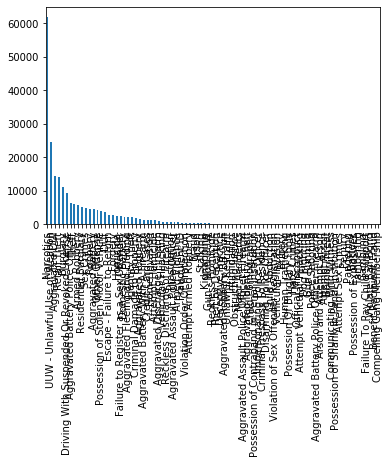

In [31]:
gg = pd.crosstab(s4['OFFENSE_CATEGORY'],s4["RACE"])
s4['OFFENSE_CATEGORY'].value_counts().plot(kind = 'bar')

In [32]:
s5 = s4.groupby("OFFENSE_CATEGORY").filter(lambda x: len(x) > 2200)
s5.shape

(199346, 11)

In [33]:
s5['OFFENSE_CATEGORY'].value_counts()

Narcotics                                    61806
UUW - Unlawful Use of Weapon                 24571
Aggravated DUI                               14338
Retail Theft                                 14107
Burglary                                     11259
Driving With Suspended Or Revoked License     9295
Aggravated Battery Police Officer             6246
Theft                                         5938
Armed Robbery                                 5739
Residential Burglary                          5260
Sex Crimes                                    4851
Robbery                                       4535
Aggravated Battery                            4523
Other Offense                                 4153
Possession of Stolen Motor Vehicle            3901
DUI                                           3709
Escape - Failure to Return                    2887
Forgery                                       2739
Homicide                                      2541
Failure to Register as a Sex Of

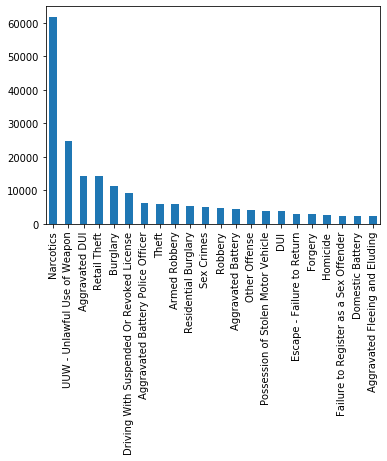

In [34]:
s5['OFFENSE_CATEGORY'].value_counts().plot(kind = 'bar')

#### From the above, Narcotics is the by far the largest offense category which makes up for 60,000 individuals followed by Unlawful Use of weapon, Aggravated DUI, Retail Theft and Burgulary. Moreover, as I scan the other categories, it is evident that a few of these categories can be consolidated further as they relate to the same crime/illegal activity. 

In [35]:
s5["OFFENSE_CATEGORY"].value_counts()

Narcotics                                    61806
UUW - Unlawful Use of Weapon                 24571
Aggravated DUI                               14338
Retail Theft                                 14107
Burglary                                     11259
Driving With Suspended Or Revoked License     9295
Aggravated Battery Police Officer             6246
Theft                                         5938
Armed Robbery                                 5739
Residential Burglary                          5260
Sex Crimes                                    4851
Robbery                                       4535
Aggravated Battery                            4523
Other Offense                                 4153
Possession of Stolen Motor Vehicle            3901
DUI                                           3709
Escape - Failure to Return                    2887
Forgery                                       2739
Homicide                                      2541
Failure to Register as a Sex Of

In [36]:

#First, I will consolidate all the thefts/burglury into one category
blst = ["Retail Theft", "Burglary","Theft","Armed Robbery", "Residential Burglary", "Robbery",
        "Possession of Stolen Motor Vehicle"]

for i in blst:
    s5["OFFENSE_CATEGORY"] = s5["OFFENSE_CATEGORY"].replace(i,"Theft")

#Second a list for all battery
clst = ["Aggravated Battery Police Officer","Aggravated Battery","Domestic Battery"]

for i in clst:
    s5["OFFENSE_CATEGORY"] = s5["OFFENSE_CATEGORY"].replace(i,"Aggravated Battery")
    
#Third, DUI followed by Fleeing
s5["OFFENSE_CATEGORY"] = s5["OFFENSE_CATEGORY"].replace("Aggravated DUI","DUI")

dlst = ["Escape - Failure to Return","Aggravated Fleeing and Eluding"]
for i in dlst:
    s5["OFFENSE_CATEGORY"] = s5["OFFENSE_CATEGORY"].replace(i,"Fleeing or Failure to Return")

s5['CHARGE_DISPOSITION'] = s5['CHARGE_DISPOSITION'].replace('GUILTY','Guilty')
    
s5["OFFENSE_CATEGORY"].value_counts()

Narcotics                                    61806
Theft                                        50739
UUW - Unlawful Use of Weapon                 24571
DUI                                          18047
Aggravated Battery                           13075
Driving With Suspended Or Revoked License     9295
Fleeing or Failure to Return                  5177
Sex Crimes                                    4851
Other Offense                                 4153
Forgery                                       2739
Homicide                                      2541
Failure to Register as a Sex Offender         2352
Name: OFFENSE_CATEGORY, dtype: int64

In [37]:
s5.columns
s5["CHARGE_DISPOSITION"].value_counts()

Plea Of Guilty                      180186
Finding Guilty                       15468
Verdict Guilty                        2584
Case Dismissed                         555
Nolle Prosecution                      220
Finding Not Not Guilty                  86
FNG Reason Insanity                     50
Finding Guilty - Lesser Included        29
FNG                                     26
Charge Vacated                          26
BFW                                     25
Plea of Guilty - Amended Charge         23
Finding Guilty But Mentally Ill         20
Plea of Guilty But Mentally Ill         17
Death Suggested-Cause Abated            11
WOWI                                     4
Verdict Guilty - Lesser Included         4
Plea of Guilty - Lesser Included         3
Nolle On Remand                          3
Superseded by Indictment                 1
SOLW                                     1
FNPC                                     1
Finding Guilty - Amended Charge          1
Verdict-Not

In [42]:
#First to consolidate the Plea's, Finding Guilty, and Verdict Guilty into Guilty
ct = 0

def guilty(inp):
    s5["CHARGE_DISPOSITION"] = s5["CHARGE_DISPOSITION"].replace(inp,"Guilty")
    

glst = ["Plea Of Guilty","Plea of Guilty - Lesser Included",
        "Plea of Guilty - Amended Charge",
        "Finding Guilty But Mentally Ill",
        "Plea of Guilty But Mentally Ill",
        "Verdict Guilty", "Finding Guilty",
       "Verdict Guilty - Lesser Included",
        "Finding Guilty - Amended Charge",
        "Finding Guilty - Lesser Included",
       "Verdict Guilty But Mentally Ill",
       "Superseded by Indictment",
       "BFW"]

for i in glst:
    guilty(i)
    

disLst = ["Case Dismissed", "Nolle Prosecution", "Nolle On Remand", "Charge Vacated", 
          "Death Suggested-Cause Abated"]
for i in disLst:
    s5["CHARGE_DISPOSITION"] = s5["CHARGE_DISPOSITION"].replace(i,"Dismissed")
    
ngLst = ["Finding Not Not Guilty", "FNG", "FNG Reason Insanity", "FNPC", "Verdict-Not Guilty"]
for i in ngLst:
    s5["CHARGE_DISPOSITION"] = s5["CHARGE_DISPOSITION"].replace(i,"Not Guilty")

#Cleaning up the remaining by turning them into NAs. These make up less than 0.0001% so they add very little value.
noLst = ["WOWI","SOLW"]
for i in noLst:
    s5["CHARGE_DISPOSITION"] = s5["CHARGE_DISPOSITION"].replace(i,np.nan)

s5.dropna()
s5.shape

(199346, 11)

In [43]:
s5["RACE"].value_counts()

Black              133105
Hispanic            36964
White               27698
Asian                1159
Unknown               289
American Indian       100
Biracial               31
Name: RACE, dtype: int64

In [44]:
s5.columns

Index(['OFFENSE_CATEGORY', 'DISPOSITION_CHARGED_OFFENSE_TITLE',
       'CHARGE_DISPOSITION', 'CHARGE_COUNT', 'ARREST_DATE', 'SENTENCE_DATE',
       'RACE', 'GENDER', 'COMMITMENT_TYPE', 'COMMITMENT_TERM',
       'UPDATED_OFFENSE_CATEGORY'],
      dtype='object')

In [52]:
s5['CHARGE_DISPOSITION'].replace(s5['CHARGE_DISPOSITION'].isnull(),np.nan)
s5['CHARGE_DISPOSITION']

120       Guilty
289       Guilty
290       Guilty
661       Guilty
662       Guilty
           ...  
241653    Guilty
241654    Guilty
241655    Guilty
241656    Guilty
241657    Guilty
Name: CHARGE_DISPOSITION, Length: 199346, dtype: object

#### Although we lost 35k rows in the data cleansing process, the existing dataset contains most of the data and can be used for further data analysis. 

In [45]:
s5.to_csv("Sentencing_Data_v2.csv")